# **TIC-TOC**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_theme(style='whitegrid')

random_seed = 10
random.seed(random_seed)
%matplotlib inline
%run -i setup/plots_settings.py

from functions.model_grid_search import *
from functions.error_and_plots import *

## Read all the data

In [2]:
re6_predictors = ['MINC', 'T10_HC_PYR', 'T30_HC_PYR', 'T50_HC_PYR', 'T70_HC_PYR',
       'T90_HC_PYR', 'T10_CO_PYR', 'T30_CO_PYR', 'T50_CO_PYR', 'T70_CO_PYR',
       'T90_CO_PYR', 'T10_CO2_PYR', 'T30_CO2_PYR', 'T50_CO2_PYR',
       'T70_CO2_PYR', 'T90_CO2_PYR', 'T10_CO_OX', 'T30_CO_OX', 'T50_CO_OX',
       'T70_CO_OX', 'T90_CO_OX', 'T10_CO2_OX', 'T30_CO2_OX', 'T50_CO2_OX',
       'T70_CO2_OX', 'T90_CO2_OX', 'S2', 'S2_PC', 'HI', 'OIre6', 'HI_OIre6', 'PC',
       'PC_TOCre6', 'TOCre6', 'TOC_istep', 'TOC_vt']

all = pd.read_csv('data/complete_dataset.csv')

only_carbonated = False
only_noncarbonated = False
TIC_carbonated_threshold = 2

if only_carbonated:
    all = all[all['TIC_istep'] > TIC_carbonated_threshold]

elif only_noncarbonated:
    all = all[all['TIC_istep'] <= TIC_carbonated_threshold]

all

,Sample,TIC_las,TOC_las,N_las,Analyse_istep,T10_HC_PYR_istep,T30_HC_PYR_istep,T50_HC_PYR_istep,T70_HC_PYR_istep,T90_HC_PYR_istep,...,delta_tic_istep_vt,C_istep,delta_toc_las_istep,delta_tic_las_istep,C_vt,delta_toc_las_vt,delta_tic_las_vt,C_re7,delta_toc_las_re7,delta_tic_las_re7
0,9248,0.00,9.001205,1.022990,SOIL_9248,314.0,374.0,417.0,460.0,525.0,...,-0.1,9.10,1.201205,-1.30,9.31,1.091205,-1.40,8.46,1.341205,-0.80
1,9249,0.00,9.920865,1.147452,SOIL_9249,318.0,375.0,419.0,462.0,528.0,...,-0.1,9.85,1.370865,-1.30,10.14,1.180865,-1.40,9.35,1.370865,-0.80
2,9255,0.00,8.021192,0.833510,SOIL_9255,311.0,370.0,415.0,458.0,524.0,...,0.0,8.10,1.021192,-1.10,8.20,0.921192,-1.10,7.79,0.931192,-0.70
3,9281,0.00,6.055106,0.580557,SOIL_9281,313.0,371.0,417.0,461.0,531.0,...,0.0,6.19,0.465106,-0.60,6.18,0.475106,-0.60,5.94,0.515106,-0.40
4,10149,0.12,13.809574,1.451916,SOIL_10149,319.0,374.0,418.0,459.0,513.0,...,0.2,13.69,1.519574,-1.28,13.46,1.549574,-1.08,13.34,1.469574,-0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,863,0.12,9.900807,0.902442,SOIL_863,314.0,375.0,420.0,466.0,541.0,...,0.0,10.11,1.090807,-1.18,9.97,1.230807,-1.18,9.46,1.340807,-0.78
236,791,0.00,17.224451,1.208873,SOIL_791,317.0,380.0,427.0,471.0,549.0,...,-0.2,17.41,2.014451,-2.20,17.46,2.164451,-2.40,15.55,3.374451,-1.70
237,6925,0.12,11.800358,1.414970,SOIL_6925,322.0,378.0,422.0,464.0,528.0,...,0.2,11.71,1.590358,-1.38,11.47,1.630358,-1.18,11.29,1.610358,-0.98
238,6961,0.00,14.513131,1.673007,SOIL_6961,321.0,377.0,420.0,462.0,524.0,...,0.1,14.10,2.213131,-1.80,14.26,1.953131,-1.70,13.43,2.283131,-1.20


## Compare TIC and TOC

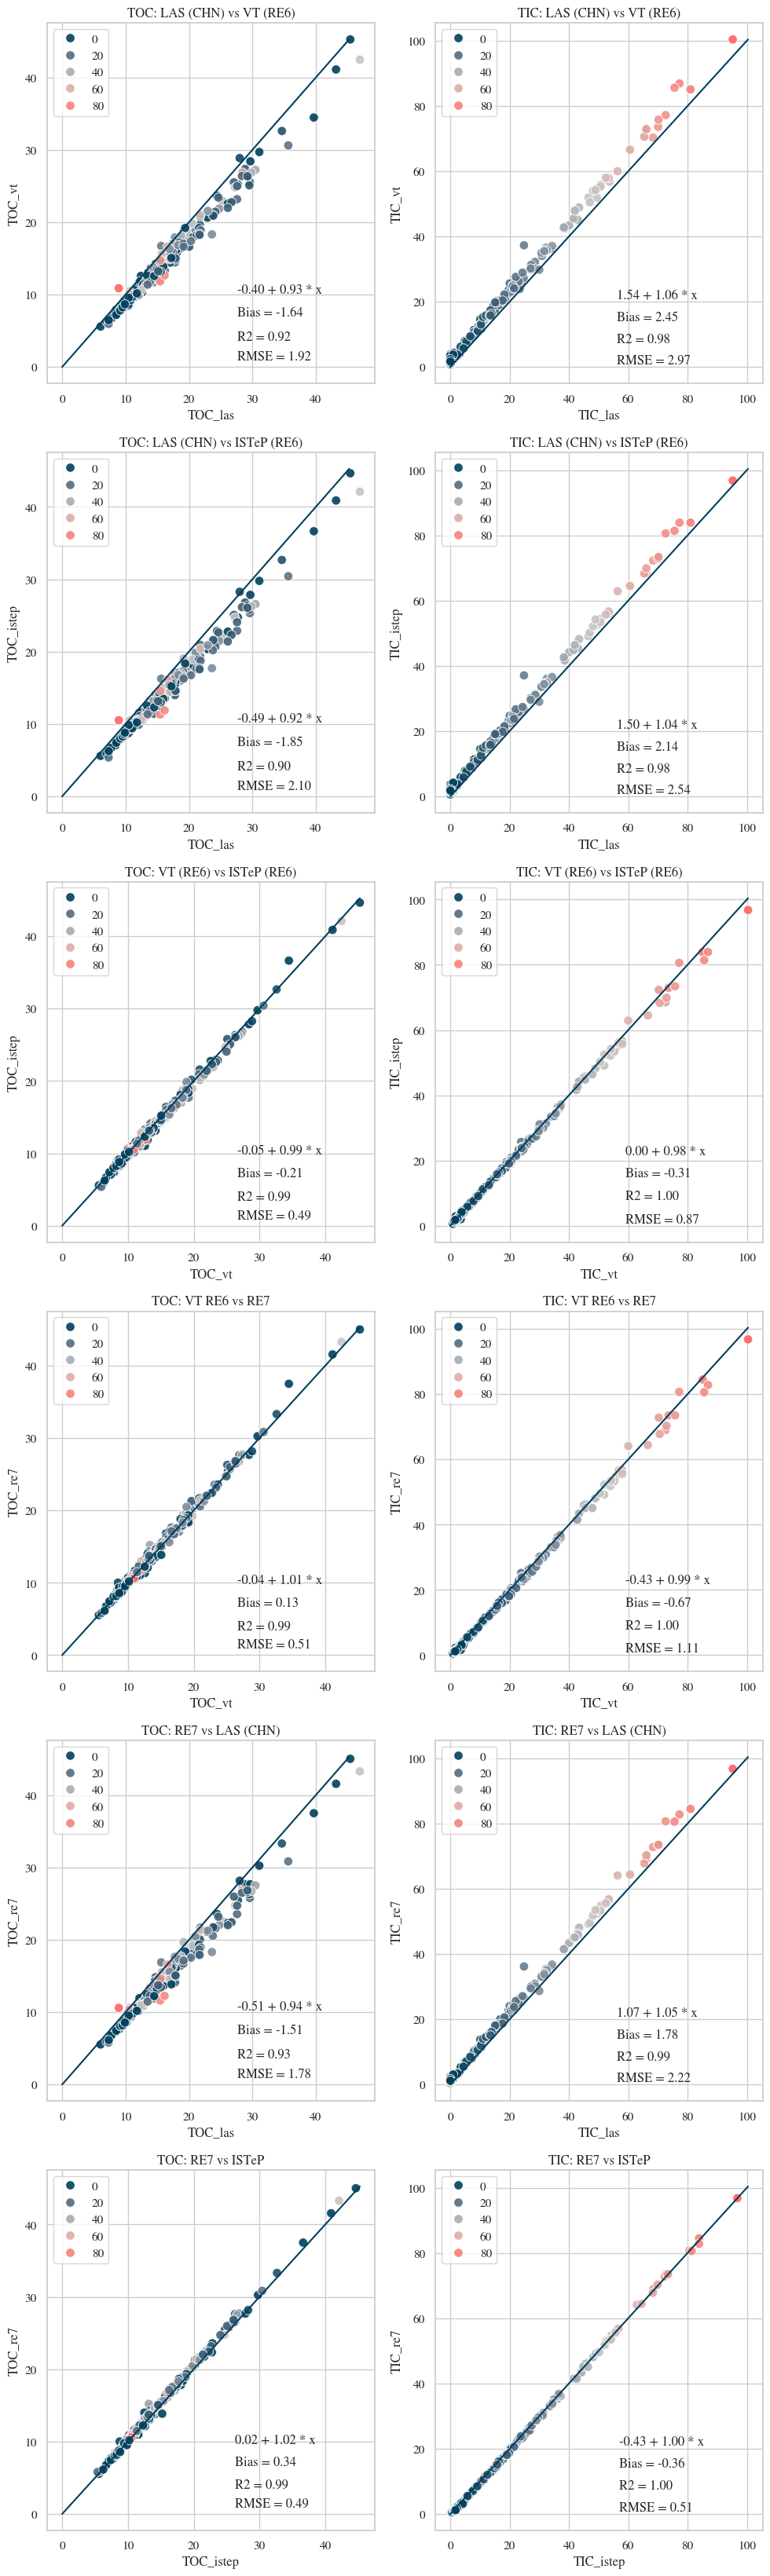

In [3]:
plt.subplots(nrows=6, ncols=2, figsize=(10,33))

plt.subplot(6,2,1)
plt.title('TOC: LAS (CHN) vs VT (RE6)')
scatterplot_comparison(all, 'TOC_las', 'TOC_vt', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TOC_vt'])], y=[0,max(all['TOC_vt'])])
plt.grid()
plt.subplot(6,2,2)
plt.title('TIC: LAS (CHN) vs VT (RE6)')
scatterplot_comparison(all, 'TIC_las', 'TIC_vt', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TIC_vt'])], y=[0,max(all['TIC_vt'])])
plt.grid()

plt.subplot(6,2,3)
plt.title('TOC: LAS (CHN) vs ISTeP (RE6)')
scatterplot_comparison(all, 'TOC_las', 'TOC_istep', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TOC_vt'])], y=[0,max(all['TOC_vt'])])
plt.grid()
plt.subplot(6,2,4)
plt.title('TIC: LAS (CHN) vs ISTeP (RE6)')
scatterplot_comparison(all, 'TIC_las', 'TIC_istep', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TIC_vt'])], y=[0,max(all['TIC_vt'])])
plt.grid()

plt.subplot(6,2,5)
plt.title('TOC: VT (RE6) vs ISTeP (RE6)')
scatterplot_comparison(all, 'TOC_vt', 'TOC_istep', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TOC_vt'])], y=[0,max(all['TOC_vt'])])
plt.grid()
plt.subplot(6,2,6)
plt.title('TIC: VT (RE6) vs ISTeP (RE6)')
scatterplot_comparison(all, 'TIC_vt', 'TIC_istep', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TIC_vt'])], y=[0,max(all['TIC_vt'])])
plt.grid()
plt.tight_layout()

plt.subplot(6,2,7)
plt.title('TOC: VT RE6 vs RE7')
scatterplot_comparison(all, 'TOC_vt', 'TOC_re7', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TOC_vt'])], y=[0,max(all['TOC_vt'])])
plt.grid()
plt.subplot(6,2,8)
plt.title('TIC: VT RE6 vs RE7')
scatterplot_comparison(all, 'TIC_vt', 'TIC_re7', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TIC_vt'])], y=[0,max(all['TIC_vt'])])
plt.grid()

plt.subplot(6,2,9)
plt.title('TOC: RE7 vs LAS (CHN)')
scatterplot_comparison(all, 'TOC_las', 'TOC_re7', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TOC_vt'])], y=[0,max(all['TOC_vt'])])
plt.grid()
plt.subplot(6,2,10)
plt.title('TIC: RE7 vs LAS (CHN)')
scatterplot_comparison(all, 'TIC_las', 'TIC_re7', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TIC_vt'])], y=[0,max(all['TIC_vt'])])
plt.grid()
plt.tight_layout()
plt.savefig('output/figures_overleaf/meeting/comparisons.png', bbox_inches='tight')

plt.subplot(6,2,11)
plt.title('TOC: RE7 vs ISTeP')
scatterplot_comparison(all, 'TOC_istep', 'TOC_re7', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TOC_vt'])], y=[0,max(all['TOC_vt'])])
plt.grid()
plt.subplot(6,2,12)
plt.title('TIC: RE7 vs ISTeP')
scatterplot_comparison(all, 'TIC_istep', 'TIC_re7', hue=all['TIC_las'])
sns.lineplot(x=[0,max(all['TIC_vt'])], y=[0,max(all['TIC_vt'])])
plt.grid()
plt.tight_layout()
plt.savefig('output/figures_overleaf/meeting/comparisons.png', bbox_inches='tight')

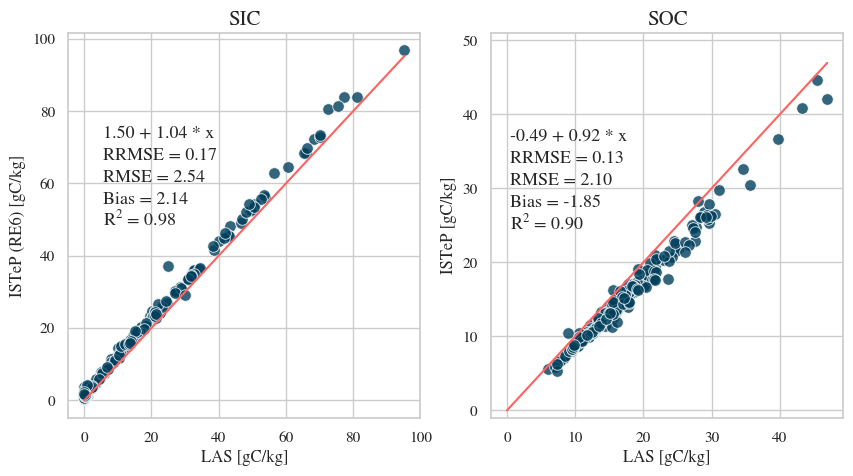

In [4]:
plt.subplots(nrows=1, ncols=2, figsize=(10,5))
from scipy import stats
plt.subplot(1,2,1)
plt.title('SIC', fontsize=15)
sns.scatterplot(data=all, x='TIC_las', y='TIC_istep', s=70, alpha=0.8)
sns.lineplot(x=[0,max(all['TIC_las'])], y=[0,max(all['TIC_las'])], color=color7d)
plt.grid(visible=True)
plt.xlabel('LAS [gC/kg]')
plt.ylabel('ISTeP (RE6) [gC/kg]')

fontsize = 13
slope, intercept, r, p, std_err = stats.linregress(x=all['TIC_las'], y=all['TIC_istep'])
rrmse = rrmse_function(y_true=all['TIC_las'], y_pred=all['TIC_istep'])
rmse = mean_squared_error(y_true=all['TIC_las'], y_pred=all['TIC_istep'], squared=False)
r2 = r2_score(y_true=all['TIC_las'], y_pred=all['TIC_istep'])
bias = bias_function(y_true=all['TIC_las'], y_pred=all['TIC_istep'])

plt.text(5.5, 72.5, '{:.2f} + {:.2f} * x'.format(intercept, slope), fontsize=fontsize)
plt.text(5.5, 66.5, 'RRMSE = {:.2f}'.format(rrmse), fontsize=fontsize)
plt.text(5.5, 60.5, 'RMSE = {:.2f}'.format(rmse), fontsize=fontsize)
plt.text(5.5, 54.5, 'Bias = {:.2f}'.format(bias), fontsize=fontsize)
plt.text(5.5, 48.5, 'R$^2$ = {:.2f}'.format(r2), fontsize=fontsize)


plt.subplot(1,2,2)
plt.title('SOC', fontsize=15)
sns.scatterplot(data=all, x='TOC_las', y='TOC_istep',  s=70, alpha=0.8)
sns.lineplot(x=[0,max(all['TOC_las'])], y=[0,max(all['TOC_las'])], color=color7d)
plt.xlabel('LAS [gC/kg]')
plt.ylabel('ISTeP [gC/kg]')
plt.grid(visible=True)

slope, intercept, r, p, std_err = stats.linregress(x=all['TOC_las'], y=all['TOC_istep'])
rrmse = rrmse_function(y_true=all['TOC_las'], y_pred=all['TOC_istep'])
rmse = mean_squared_error(y_true=all['TOC_las'], y_pred=all['TOC_istep'], squared=False)
r2 = r2_score(y_true=all['TOC_las'], y_pred=all['TOC_istep'])
bias = bias_function(y_true=all['TOC_las'], y_pred=all['TOC_istep'])

plt.ylim([-1, 51])
plt.text(0.5, 36.5, '{:.2f} + {:.2f} * x'.format(intercept, slope), fontsize=fontsize)
plt.text(0.5, 33.5, 'RRMSE = {:.2f}'.format(rrmse), fontsize=fontsize)
plt.text(0.5, 30.5, 'RMSE = {:.2f}'.format(rmse), fontsize=fontsize)
plt.text(0.5, 27.5, 'Bias = {:.2f}'.format(bias), fontsize=fontsize)
plt.text(0.5, 24.5, 'R$^2$ = {:.2f}'.format(r2), fontsize=fontsize)


plt.savefig('technical_note/figures/comparison_las_istep.png', bbox_inches='tight')

# Check the yield

Text(0.5, 1.0, 'yield_vt_las')

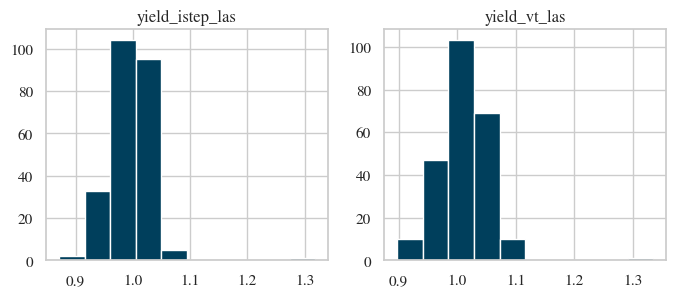

In [5]:
all['yield_istep_las'] = (all['TIC_istep'] + all['TOC_istep']) / (all['TIC_las'] + all['TOC_las'])
all['yield_vt_las'] = (all['TIC_vt'] + all['TOC_vt']) / (all['TIC_las'] + all['TOC_las'])

plt.subplots(nrows=1, ncols=2, figsize=(8,3))
plt.subplot(1,2,1)
all['yield_istep_las'].hist()
plt.title('yield_istep_las')
plt.subplot(1,2,2)
all['yield_vt_las'].hist()
plt.title('yield_vt_las')


## Dataset distributions

Text(0.5, 0, 'SOC class')

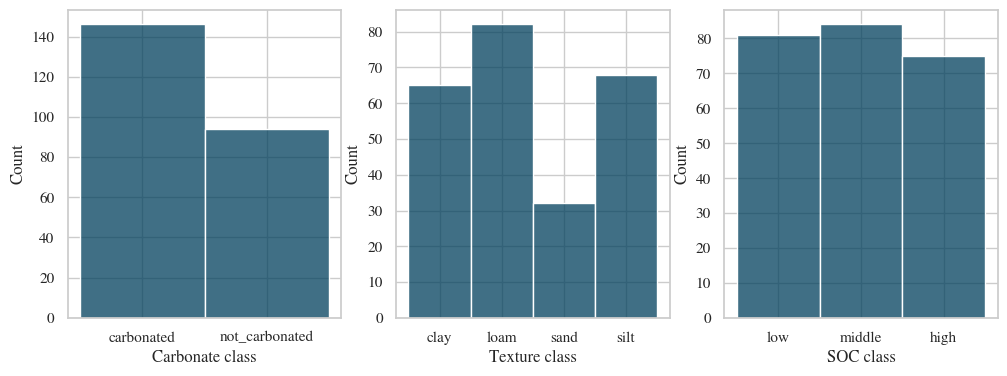

In [6]:
control = pd.read_excel('data/carbonates_class.xlsx', engine='openpyxl')
plt.subplots(ncols=3, nrows=1, figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data=control, x='carbonate_class')
plt.xlabel('Carbonate class')
plt.subplot(1,3,2)
sns.histplot(data=control, x='broad_texture_class')
plt.xlabel('Texture class')
plt.subplot(1,3,3)
sns.histplot(data=control, x='toc_class')
plt.xlabel('SOC class')

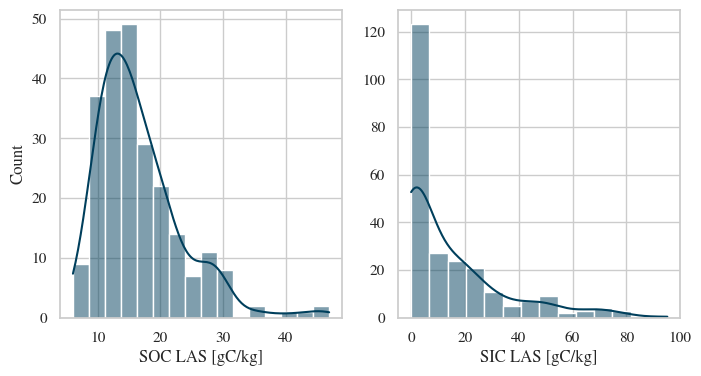

In [7]:
plt.subplots(ncols=2, nrows=1, figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data=all, x='TOC_las', kde=True)
plt.xlabel('SOC LAS [gC/kg]')
plt.subplot(1,2,2)
sns.histplot(data=all, x='TIC_las', kde=True)
plt.xlabel('SIC LAS [gC/kg]')
plt.ylabel('')

plt.savefig('technical_note/figures/distribution_TIC_TOC.png', bbox_inches='tight', dpi=1000)

In [8]:
texture = pd.read_csv('data/texture.csv')
texture['Clay'] = texture['clay_sed']
texture['Sand'] = texture['sand_sed']
texture['Silt'] = texture['coarse_silt_sed'] + texture['fine_medium_silt_sed']
texture['Texture class'] = texture['texture_class']

texture = texture[texture['id'].isin(all['Sample'].values.astype(int))]


In [9]:
import plotly.express as px

fig = px.scatter_ternary(texture, a="Clay", b="Sand", c="Silt", size="TOC_CHN", 
                         labels={'color' : 'Texture class', 'symbol' : ''},
    color=texture['Texture class'].astype(str),
    symbol=texture['Texture class'].astype(str),
    color_discrete_map={'loamy_sand':color1d, 
                        'clay' : color2d,
                        'silty_clay_loam' : color7d,
                        'clay_loam' : color9dgray,
                        'silt_loam' : color5d,
                        'sandy_loam' : color3d,
                        'silty_clay' : color4d,
                        'loam' : color8dyellow,
                        'sandy_clay_loam' : color6d},
    width=1200, height=700, 
    opacity=0.8,
    # title='Cluster distribution based on texture. Point size is Corg (g/kg).'
    )

fig.update_layout(
    font_family="Times New Roman",
    font_color="black",
    font_size=30,
    title_font_family="Times New Roman",
    title_font_color="black",
    legend_title_font_color="black",
    legend_font_size=28,
    legend_font_family = "Times New Roman",
    legend_title='Texture class',
    legend= {'itemsizing': 'constant'}
)

fig.update_layout(
                                template='plotly_white',
                                # plot_bgcolor='rgba(0, 0, 0, 0)',
                                # paper_bgcolor='rgba(0, 0, 0, 0)',
                            )
fig.update_xaxes(showgrid=True, gridwidth=7, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

newnames = {'loamy_sand, loamy_sand': 'Loamy sand',
            'clay, clay': 'Clay',
            'silty_clay_loam, silty_clay_loam': 'Silty clay loam',
            'clay_loam, clay_loam': 'Clay loam',
            'silt_loam, silt_loam': 'Silt loam',
            'sandy_loam, sandy_loam': 'Sandy loam',
            'silty_clay, silty_clay': 'Silty clay',
            'loam, loam': 'Loam',
            'sandy_clay_loam, sandy_clay_loam': 'Sandy clay loam',
            }
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.75
))

fig.show()
# fig.write_image("technical_note/figures/texture.png")
# plt.savefig(os.path.join(figures_folder, 'texture_triangle_nclusters='+str(n_clusters_soil)+'_linkage='+ linkage+'.pdf'))

## Corrections

In [10]:
correlations_all = all.corr(method='spearman', numeric_only=True)

In [11]:
columns_to_drop=['PseudoS1',
                 'PseudoS1_vt',
                 'PseudoS1_istep',
                 'PseudoS1_re7', 
                 'TIC_las', 
                 'TOC_las', 
                 'TIC_merieux', 
                 'TOC_merieux', 
                 'TIC_vt', 
                 'TOC_vt', 
                 'Analyse', 
                 'Analysis',
                 'Analyse_istep',
                 'Analyse_vt',
                 'Prefix',
                 'Prefix_vt',
                 'Prefix_istep', 
                 'Sample',
                 'yield_istep_las',
                 'yield_istep_merieux',
                 'yield_vt_las',
                 'yield_vt_merieux',
                 'delta_toc_las_merieux',
                 'delta_tic_las_merieux',
                 'delta_c_las_merieux',
                 'delta_toc_istep_vt',
                 'delta_tic_istep_vt',
                 'C_istep',
                 'delta_toc_las_istep',
                 'delta_tic_las_istep',
                 'delta_toc_merieux_istep',
                 'delta_tic_merieux_istep',
                 'C_vt',
                 'delta_toc_las_vt',
                 'delta_tic_las_vt',
                 'delta_toc_merieux_vt',
                 'delta_tic_merieux_vt',
                 'C_re7',
                 'delta_toc_las_re7',
                 'delta_tic_las_re7',
                 'delta_toc_merieux_re7',
                 'delta_tic_merieux_re7',
                 'delta_toc_las_merieux',
                 'delta_tic_las_merieux',
                 'delta_c_las_merieux',
                 'C_las',
                 'C_merieux',
                 'CoverN_las',
                 'CoverN_merieux',
                 'C_re7']

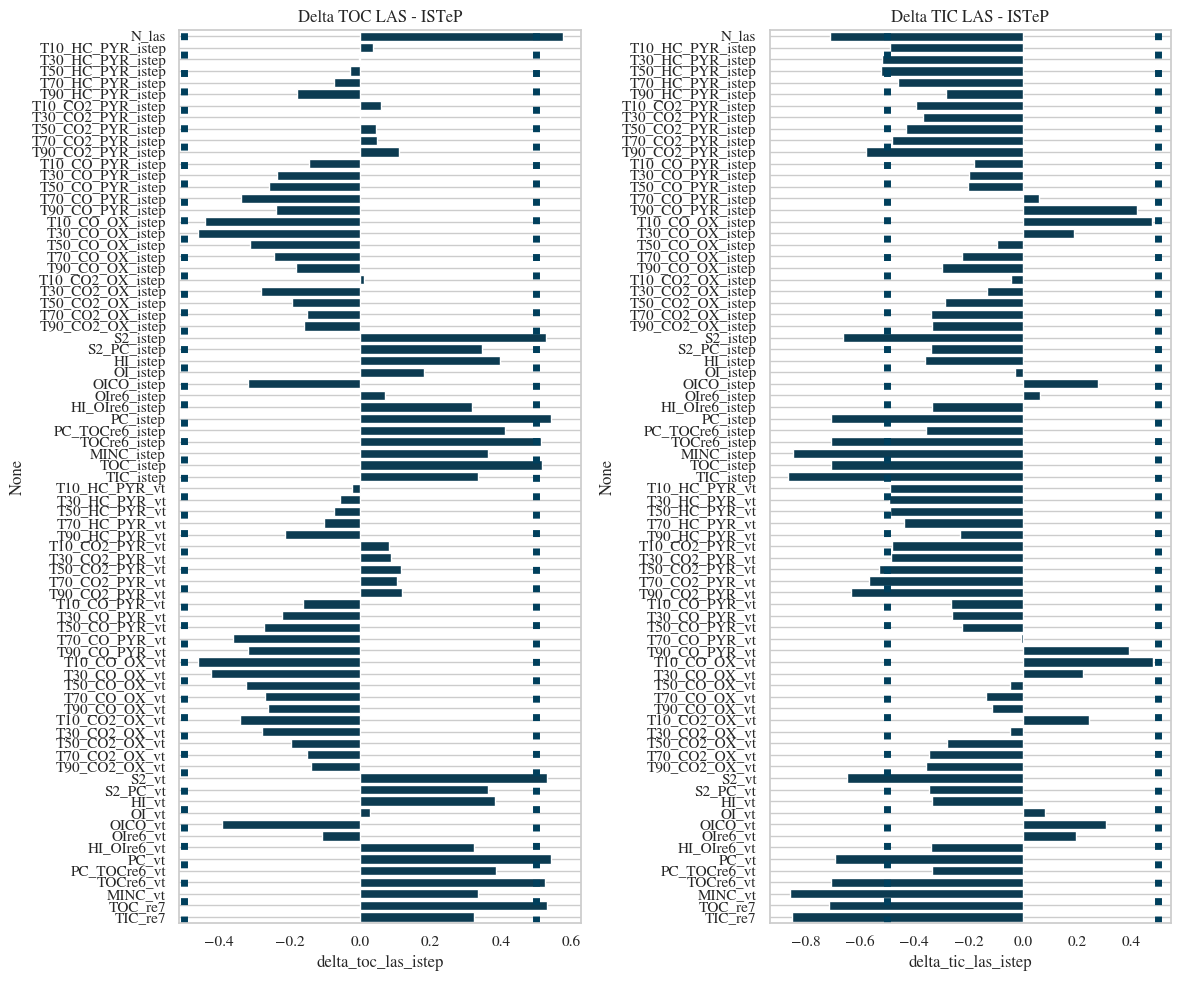

In [12]:
plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
plt.subplot(1,2,1)
sns.barplot(y=correlations_all['delta_toc_las_istep'].drop(columns_to_drop, errors='ignore').keys(), x=correlations_all['delta_toc_las_istep'].drop(columns_to_drop, errors='ignore'), orient='h')
plt.axvline(0.5, ls='dotted', lw=5)
plt.axvline(-0.5, ls='dotted', lw=5)
plt.title("Delta TOC LAS - ISTeP")
plt.grid()

plt.subplot(1,2,2)
sns.barplot(y=correlations_all['delta_tic_las_istep'].drop(columns_to_drop, errors='ignore').keys(), x=correlations_all['delta_tic_las_istep'].drop(columns_to_drop, errors='ignore'), orient='h')
plt.axvline(0.5, ls='dotted', lw=5)
plt.axvline(-0.5, ls='dotted', lw=5)
plt.title("Delta TIC LAS - ISTeP")
plt.grid()
plt.tight_layout()

## General correction function

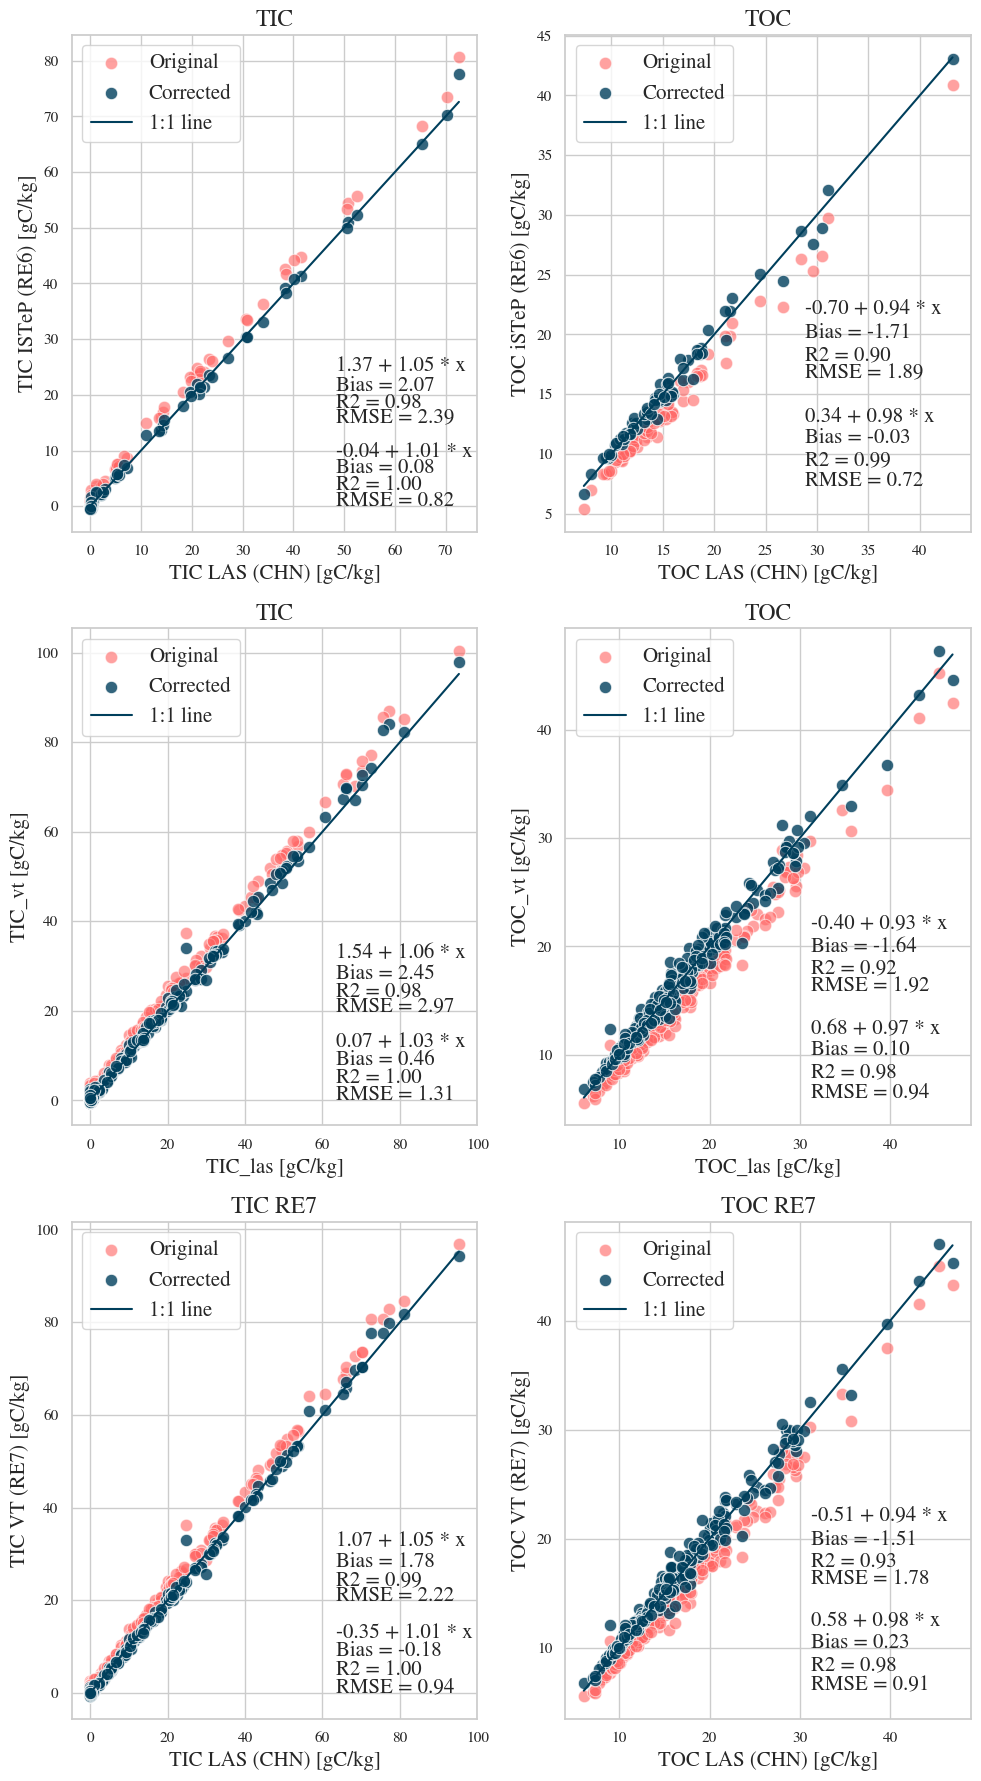

In [13]:
re6_origin='istep'
chn_origin='las'
model_name = 'SVM'
features='selected'
# features_tic = ['T90_CO2_PYR', 'T90_CO2_OX', 'T30_CO2_OX', 'TIC_'+re6_origin] # if you wanna test with more features (can be chosen based on the correlation figures)
# features_toc = ['TIC_'+re6_origin, 'PC_TOCre6', 'T90_CO_OX', 'TOC_'+re6_origin]
features_tic = ['TIC_'+re6_origin]
features_toc = ['TOC_'+re6_origin]

report=[]
report_columns = [
    'Model',
    'Target',
    'CHN_origin',
    'RE_origin',
    'Features',
    'CHN_target',
    'RE_target',
    'R2',
    'Bias',
    'RMSE',
    'RPIQ,',
    'Slope',
    'Intercept',
    'R2_corrected',
    'Bias_corrected',
    'RMSE_corrected',
    'RPIQ_corrected',
    'Slope_corrected',
    'Intercept_corrected',
]
report, regressor_toc, regressor_tic, train_index, test_index = run_full_model(data=all,
                                                                               re6_predictors=re6_predictors,
                                                                               re6_origin=re6_origin, 
                                                                               chn_origin=chn_origin, 
                                                                               model_name=model_name, 
                                                                               features=features, 
                                                                               features_tic=features_tic,
                                                                               features_toc=features_toc,
                                                                               report=report, 
                                                                               only_carbonated=only_carbonated, 
                                                                               only_noncarbonated=only_noncarbonated)

In [14]:
# if you want to run all combinations 
re6_origin='istep'
chn_origin='las'
model_name = 'SVM'
features='selected'
TIC_carbonated_threshold = 2
features_tic = ['TIC_'+re6_origin]
features_toc = ['TOC_'+re6_origin]

regressors_tic = {}
regressors_toc = {}

report=[]
report_columns = [
    'Model',
    'Target',
    'CHN_origin',
    'RE_origin',
    'Features',
    'CHN_target',
    'RE_target',
    'R2',
    'Bias',
    'RMSE',
    'RPIQ,',
    'Slope',
    'Intercept',
    'R2_corrected',
    'Bias_corrected',
    'RMSE_corrected',
    'RPIQ_corrected',
    'Slope_corrected',
    'Intercept_corrected',
]

for re6_origin in ['istep', 'vt']:
    for chn_origin in ['las']:
        for model_name in ['SVM', 'RF', 'LR', 'Ridge']:
            for features in ['selected']:#, 'all]
                report, regressors_toc[model_name], regressors_tic[model_name], _, _ = run_full_model(data=all,
                                                                                                      re6_predictors=re6_predictors,
                                                                                                      re6_origin=re6_origin, 
                                                                                                      chn_origin=chn_origin, 
                                                                                                      model_name=model_name, 
                                                                                                      features=features, 
                                                                                                      report=report, 
                                                                                                      only_carbonated=only_carbonated, 
                                                                                                      only_noncarbonated=only_noncarbonated,
                                                                                                      TIC_carbonated_threshold= TIC_carbonated_threshold)
                plt.close()

final_report = pd.DataFrame(report, columns=report_columns).round(4)


## Hazera correction 

Taken from [here](https://bg.copernicus.org/articles/20/5229/2023/bg-20-5229-2023.pdf):

If carbonated and enriched in poorly degraded organic compounds and
litter debris:
- TOC_corrected = 1.17 \* TOCre6
- TIC_corrected = MINC - 0.092\*TOCre6

If non-carbonated and enriched in poorly degraded organic compounds and
litter debris:
- TOC_corrected = (TOC + MINC) * 1.068
- MINC_corrected = 0

The article does not provide a definition of non-carbonated and only 4 samples are considered as such. 
They all have a TIC > 2gC/kg so we will use that threshold. 

In [15]:
def hazera_correction(data:pd.DataFrame, re6_source:str, noncarbonated_threshold_Hazera:float=2):
    # the mask containts the list of non-carbonated soils
    mask = (data['TIC_'+re6_source] <= noncarbonated_threshold_Hazera)

    data['tic_correction_Hazera_'+re6_source] = - 0.092 * data['TOC_'+re6_source]
    data.loc[mask, 'tic_correction_Hazera_'+re6_source] = - data['TIC_'+re6_source]

    data['toc_correction_Hazera_'+re6_source] = + 0.17 * data['TOC_'+re6_source]
    data.loc[mask, 't0c_correction_Hazera_'+re6_source] = + data['TOC_'+re6_source] * 0.068 + data['TIC_'+re6_source] * 1.068

    return data


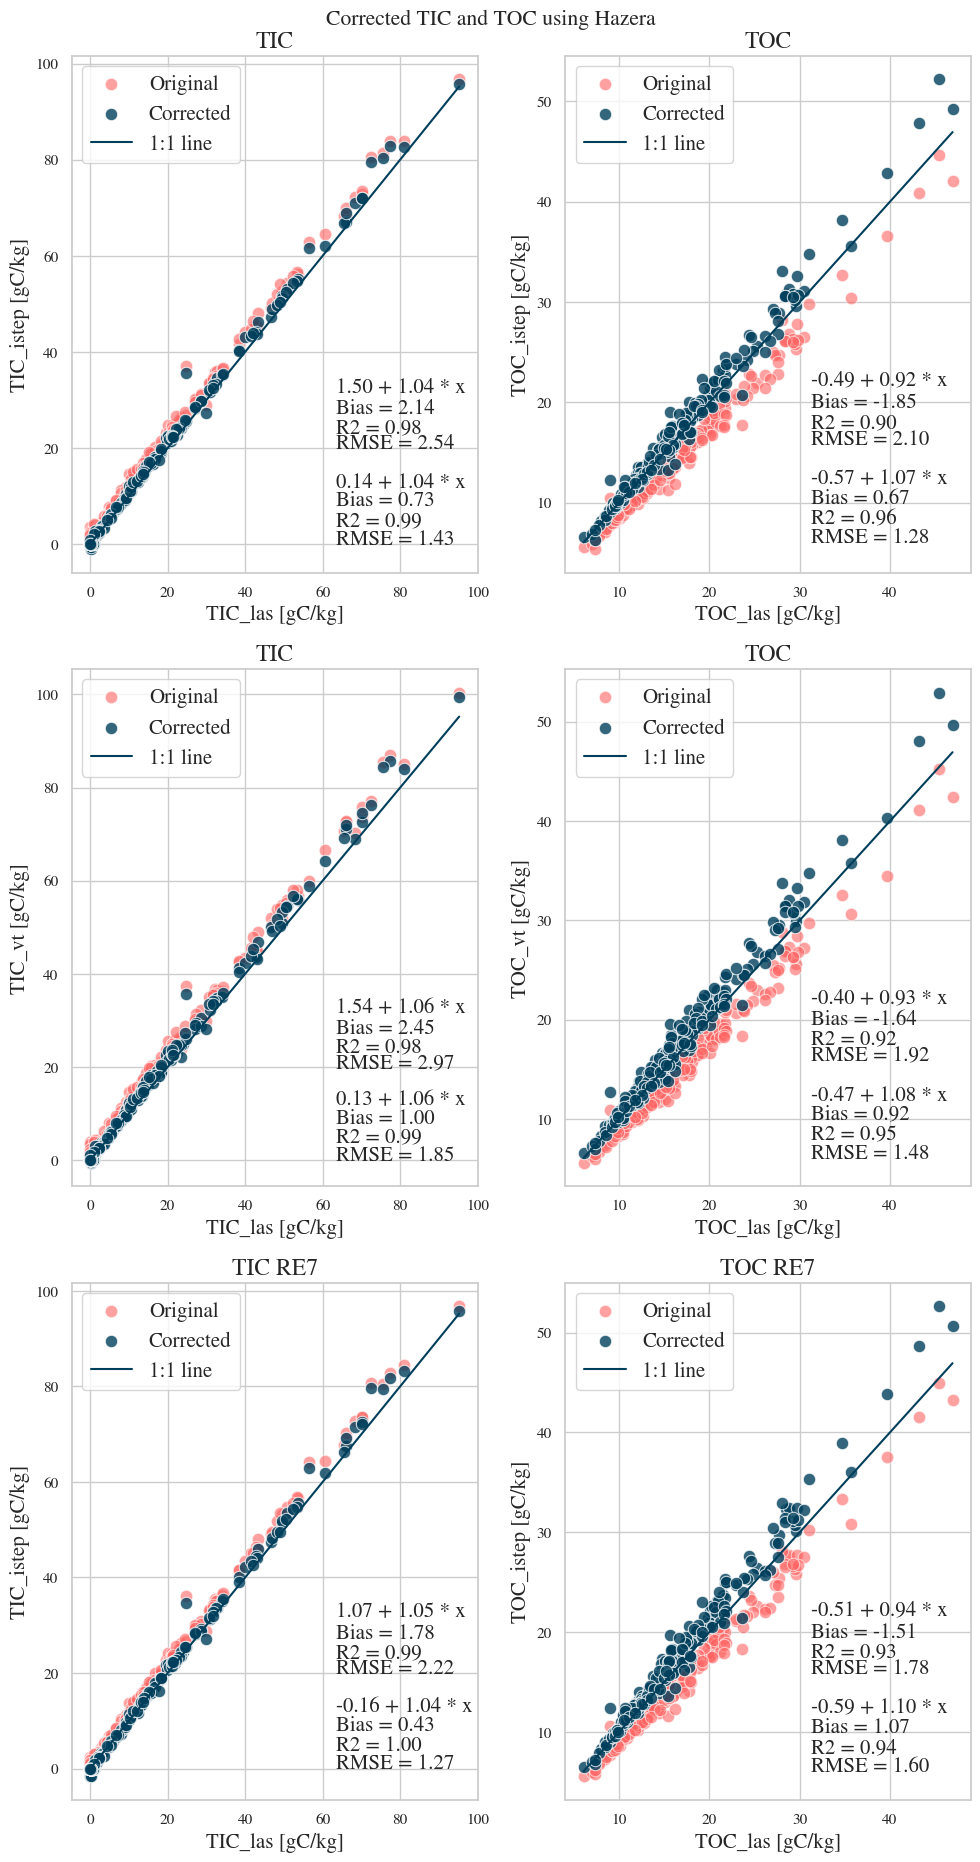

In [16]:
re6_origin='istep'
chn_origin='las'
model_name = 'Hazera'
features='selected'
noncarbonated_threshold_Hazera = 2
data_type = '_' + only_carbonated*'only_carbonated' + only_noncarbonated*'only_noncarbonated'

all_vt = all.loc[:,(~all.columns.str.contains('_istep', case=False)&(~all.columns.str.contains('_re7', case=False)))].copy()
all_istep = all.loc[:,(~all.columns.str.contains('_re7', case=False)&(~all.columns.str.contains('_vt', case=False)))].copy()
all_re7 = all.loc[:,(~all.columns.str.contains('_istep', case=False)&(~all.columns.str.contains('_vt', case=False)))].copy()


all_istep = hazera_correction(all_istep, 'istep')
all_vt = hazera_correction(all_vt, 'vt')
all_re7 = hazera_correction(all_re7, 're7')

plt.subplots(3, 2, figsize=(10,19))
plt.suptitle('Corrected TIC and TOC using Hazera')
# LAS ISTEP
plt.subplot(3,2,1)
y_chn_las_istep = all_istep['TIC_las']
y_re_las_istep = all_istep['TIC_istep']
r2, bias, rmse, rpiq, slope, intercept, r2_corrected, bias_corrected, rmse_corrected, rpiq_corrected, intercept_corrected, slope_corrected = scatterplot_correction(x=y_chn_las_istep, y=y_re_las_istep, correction=all_istep['tic_correction_Hazera_istep'], xlabel='TIC_las', ylabel='TIC_istep', name='TIC')
plt.grid()

plt.subplot(3,2,2)
y_chn_las_istep = all_istep['TOC_las']
y_re_las_istep = all_istep['TOC_istep']
r2, bias, rmse, rpiq, slope, intercept, r2_corrected, bias_corrected, rmse_corrected, rpiq_corrected, intercept_corrected, slope_corrected = scatterplot_correction(x=y_chn_las_istep, y=y_re_las_istep, correction=all_istep['toc_correction_Hazera_istep'], xlabel='TOC_las', ylabel='TOC_istep', name='TOC')
plt.grid()

# LAS vt
plt.subplot(3,2,3)
y_chn_las_vt = all_vt['TIC'+'_las']
y_re_las_vt = all_vt['TIC_vt']
r2, bias, rmse, rpiq, slope, intercept, r2_corrected, bias_corrected, rmse_corrected, rpiq_corrected, intercept_corrected, slope_corrected = scatterplot_correction(x=y_chn_las_vt, y=y_re_las_vt, correction=all_vt['tic_correction_Hazera_vt'], xlabel='TIC_las', ylabel='TIC_vt', name='TIC')
plt.grid()

plt.subplot(3,2,4)
y_chn_las_vt = all_vt['TOC'+'_las']
y_re_las_vt = all_vt['TOC_vt']
r2, bias, rmse, rpiq, slope, intercept, r2_corrected, bias_corrected, rmse_corrected, rpiq_corrected, intercept_corrected, slope_corrected = scatterplot_correction(x=y_chn_las_vt, y=y_re_las_vt, correction=all_vt['toc_correction_Hazera_vt'], xlabel='TOC_las', ylabel='TOC_vt', name='TOC')
plt.grid()

# RE7
plt.subplot(3,2,5)
y_chn_re7_las_istep = all_re7['TIC'+'_las']
y_re_re7_las_istep = all_re7['TIC_re7']
r2, bias, rmse, rpiq, slope, intercept, r2_corrected, bias_corrected, rmse_corrected, rpiq_corrected, intercept_corrected, slope_corrected = scatterplot_correction(x=y_chn_re7_las_istep, y=y_re_re7_las_istep, correction=all_re7['tic_correction_Hazera_re7'], xlabel='TIC_las', ylabel='TIC_istep', name='TIC RE7')
plt.grid()

plt.subplot(3,2,6)
y_chn_re7_las_istep = all_re7['TOC'+'_las']
y_re_re7_las_istep = all_re7['TOC_re7']
r2, bias, rmse, rpiq, slope, intercept, r2_corrected, bias_corrected, rmse_corrected, rpiq_corrected, intercept_corrected, slope_corrected = scatterplot_correction(x=y_chn_re7_las_istep.astype(float), y=y_re_re7_las_istep.astype(float), correction=all_re7['toc_correction_Hazera_re7'], xlabel='TOC_las', ylabel='TOC_istep', name='TOC RE7')
plt.grid()

plt.tight_layout()
plt.savefig('output/corrections/'+model_name+'/'+chn_origin + '_' + re6_origin + '_features=' + str(features)+  data_type + '.png', bbox_inches='tight')


# Supplementary material

## Comparing models

In [17]:
re6_origin='istep'
chn_origin='las'
model_name = 'SVM'
features='selected'
only_noncarbonated=False
only_carbonated=False
TIC_carbonated_threshold = 2
features_tic = ['TIC_'+re6_origin]
features_toc = ['TOC_'+re6_origin]

regressors_tic_supplementary = {}
regressors_toc_supplementary = {}

for model_name in ['SVM', 'RF', 'LR', 'Ridge']:
    _, regressors_toc_supplementary[model_name], regressors_tic_supplementary[model_name], _, _ = run_full_model(data=all,
                                                                                                                 re6_predictors=re6_predictors,
                                                                                                                 re6_origin=re6_origin, 
                                                                                                                 chn_origin=chn_origin, 
                                                                                                                 model_name=model_name, 
                                                                                                                 features=features, 
                                                                                                                 report=report, 
                                                                                                                 only_carbonated=only_carbonated, 
                                                                                                                 only_noncarbonated=only_noncarbonated,
                                                                                                                 TIC_carbonated_threshold= TIC_carbonated_threshold)
    plt.close()

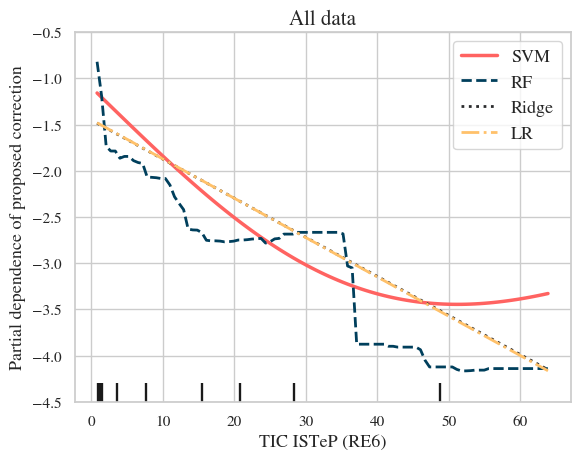

In [18]:
from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(regressors_tic_supplementary['SVM'], 
                                                all[['TIC_istep']], 
                                                features=['TIC_istep'], 
                                                line_kw={"linewidth": 2.5, "label": "SVM", "color": color7d},)
disp2 = PartialDependenceDisplay.from_estimator(regressors_tic_supplementary['RF'], 
                                                all[['TIC_istep']], 
                                                features=['TIC_istep'],
                                                ax=disp1.axes_ ,
                                                line_kw={"linewidth": 2, "label": "RF", "color": color1d, 'linestyle':'--'},)
disp3 = PartialDependenceDisplay.from_estimator(regressors_tic_supplementary['Ridge'], 
                                                all[['TIC_istep']], 
                                                features=['TIC_istep'], 
                                                ax=disp1.axes_, 
                                                line_kw={"linewidth": 2, "label": "Ridge", "color": color9dgray, 'linestyle':':'})
disp4 = PartialDependenceDisplay.from_estimator(regressors_tic_supplementary['LR'], 
                                                all[['TIC_istep']], 
                                                features=['TIC_istep'], 
                                                ax=disp1.axes_,
                                                line_kw={"linewidth": 2, "label": "LR", "color": color8dyellow, 'linestyle':'-.'},)
plt.ylim([-4.5, -0.5])
plt.xlabel('TIC ISTeP (RE6)', fontsize=13)
plt.ylabel('Partial dependence of proposed correction', fontsize=13)
plt.title('All data', fontsize=15)
plt.legend(fontsize=13)
plt.savefig('technical_note/figures/all_data_pdp_tic.png', bbox_inches='tight')
                                                

<Axes: xlabel='TIC_las', ylabel='TOC_las'>

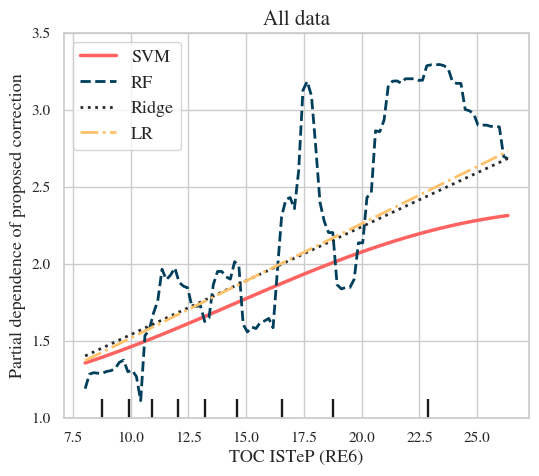

In [21]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,5))
disp1 = PartialDependenceDisplay.from_estimator(regressors_toc_supplementary['SVM'], 
                                                all[['TOC_istep']], 
                                                features=['TOC_istep'], 
                                                line_kw={"linewidth": 2.5, "label": "SVM", "color": color7d},
                                                ax=ax1)
disp2 = PartialDependenceDisplay.from_estimator(regressors_toc_supplementary['RF'], 
                                                all[['TOC_istep']], 
                                                features=['TOC_istep'],
                                                ax=disp1.axes_ ,
                                                line_kw={"linewidth": 2, "label": "RF", "color": color1d, 'linestyle':'--'},)
disp3 = PartialDependenceDisplay.from_estimator(regressors_toc_supplementary['Ridge'], 
                                                all[['TOC_istep']], 
                                                features=['TOC_istep'], 
                                                ax=disp1.axes_, 
                                                line_kw={"linewidth": 2, "label": "Ridge", "color": color9dgray, 'linestyle':':'},)
disp4 = PartialDependenceDisplay.from_estimator(regressors_toc_supplementary['LR'], 
                                                all[['TOC_istep']], 
                                                features=['TOC_istep'], 
                                                ax=disp1.axes_,
                                                line_kw={"linewidth": 2, "label": "LR", "color": color8dyellow, 'linestyle':'-.'},)

plt.ylim([1.0, 3.5])
plt.xlabel('TOC ISTeP (RE6)', fontsize=13)
plt.ylabel('Partial dependence of proposed correction', fontsize=13)
plt.title('All data', fontsize=15)
plt.legend(fontsize=13)

sns.scatterplot(data=all, x='TIC_las', y='TOC_las',ax=ax1)